In [1]:
import numpy as np
from mpitree.decision_tree import DecisionTreeClassifier

In [9]:
m, n = 100, 3
n_classes = 2

In [10]:
X = np.random.choice([f"f{i}" for i in range(n)], (m, n))
y = np.random.randint(n_classes, size=m)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf)

In [ ]:
# test `proba` attribute

proba = clf.predict_proba(X_test)

assert proba.shape[1] == n_classes
assert ((proba >= 0.0) & (proba <= 1.0)).all()
assert (np.isclose(np.sum(proba, axis=1), 1.0)).all()

In [ ]:
def cmp(a, b):
    display(a.export_graphviz())
    assert str(a).splitlines() == b.split("\n")

In [ ]:
# not fitted

try:
    a = DecisionTreeClassifier()
    str(a)
except Exception as e:
    print(e)

This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


In [ ]:
# empty dataset

try:
    X, y = [[]], []
    DecisionTreeClassifier().fit(X, y)
except Exception as e:
    print(e)

Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.


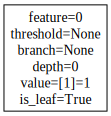

In [ ]:
# single instance

X, y = [["f0"]], [0]

cmp(
    DecisionTreeClassifier().fit(X, y),
    """\
└── class: 0""",
)

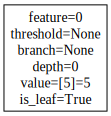

In [ ]:
# multiple instance, same label

X, y = np.full((5, 1), "f0"), np.zeros(5).astype(int)

cmp(
    DecisionTreeClassifier().fit(X, y),
    """\
└── class: 0""",
)

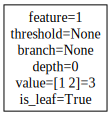

In [ ]:
# multiple same instances

X, y = np.full((3, 2), ["f0", "f1"]), [1, 1, 0]

cmp(
    DecisionTreeClassifier().fit(X, y),
    """\
└── class: 1""",
)

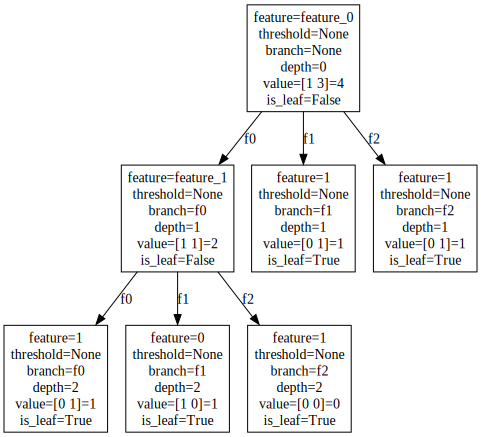

In [ ]:
# empty partitioned dataset

X, y = [["f0", "f0"], ["f0", "f1"], ["f1", "f2"], ["f2", "f1"]], [1, 0, 1, 1]

cmp(
    DecisionTreeClassifier().fit(X, y),
    """\
┌── feature_0
│  ├── feature_1 [f0]
│  │  └── class: 1 [f2]
│  │  └── class: 0 [f1]
│  │  └── class: 1 [f0]
│  └── class: 1 [f2]
│  └── class: 1 [f1]""",
)

In [ ]:
# testing depth and is_leaf

X, y = [["f0", "f0"], ["f0", "f1"], ["f1", "f2"], ["f2", "f1"]], [1, 0, 1, 1]

from collections import deque


def bfs(source):
    queue = deque([source])
    while queue:
        node = queue.popleft()
        yield node
        queue.extend(node.children.values())


clf = DecisionTreeClassifier().fit(X, y)

for depth, node in enumerate(bfs(clf.tree_), start=1):
    assert all(n.depth == depth for n in node.children.values())
    assert not node.is_leaf if node.children else node.is_leaf

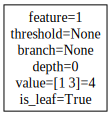

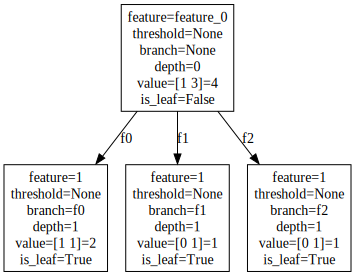

In [ ]:
X, y = [["f0", "f0"], ["f0", "f1"], ["f1", "f2"], ["f2", "f1"]], [1, 0, 1, 1]

cmp(
    DecisionTreeClassifier(max_depth=0).fit(X, y),
    """\
└── class: 1""",
)

cmp(
    DecisionTreeClassifier(max_depth=1).fit(X, y),
    """\
┌── feature_0
│  └── class: 1 [f2]
│  └── class: 1 [f1]
│  └── class: 1 [f0]""",
)

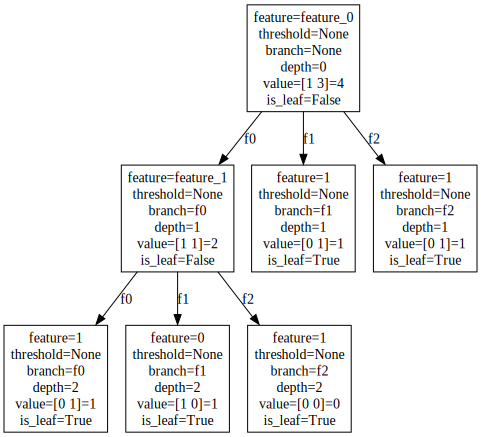

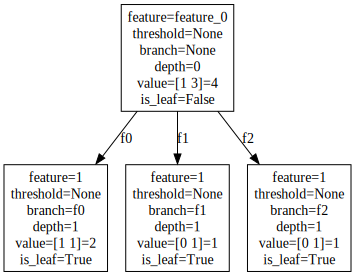

In [ ]:
cmp(
    DecisionTreeClassifier(min_samples_split=0).fit(X, y),
    """\
┌── feature_0
│  ├── feature_1 [f0]
│  │  └── class: 1 [f2]
│  │  └── class: 0 [f1]
│  │  └── class: 1 [f0]
│  └── class: 1 [f2]
│  └── class: 1 [f1]""",
)

cmp(
    DecisionTreeClassifier(min_samples_split=4).fit(X, y),
    """\
┌── feature_0
│  └── class: 1 [f2]
│  └── class: 1 [f1]
│  └── class: 1 [f0]""",
)

In [18]:
# from matplotlib.colors import ListedColormap
# import matplotlib.patches as mpatches

# h = 0.02

# a = "#4993c3"
# b = "#e73031"
# c = "#e3c471"

# aa = "#0000ec"
# bb = "#ff0000"
# cc = "#bfbf00"

# # Create color maps
# cmap_light = ListedColormap([a, b, c])
# cmap_bold = ListedColormap([aa, bb, cc])

# fig = plt.figure()
# gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
# (ax1, ax2), (ax3, ax4) = gs.subplots(sharex="col", sharey="row")

# depths = [1, 3, 5, 10]
# coor = [ax1, ax2, ax3, ax4]

# for depth, ax in zip(depths, coor):
#     clf = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)

#     x_min, x_max = (
#         X_train.values[:, 0].min() - 1,
#         X_train.values[:, 0].max() + 1,
#     )
#     y_min, y_max = (
#         X_train.values[:, 1].min() - 1,
#         X_train.values[:, 1].max() + 1,
#     )

#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     X_t = pd.DataFrame(
#         np.c_[xx.ravel(), yy.ravel()], columns=["sepal length (cm)", "sepal width (cm)"]
#     )

#     Z = clf.predict(X_t)
#     Z = Z.reshape(xx.shape)

#     ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

#     ax.scatter(
#         X_train.values[:, 0],
#         X_train.values[:, 1],
#         c=y_train.values,
#         cmap=cmap_bold,
#         s=15,
#         edgecolors="black",
#         label=f"Depth={depth}",
#     )

#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())

#     if depth == 3:
#         patches = [
#             mpatches.Patch(color=aa, label="iris setosa"),
#             mpatches.Patch(color=bb, label="iris versicolor"),
#             mpatches.Patch(color=cc, label="iris virginica"),
#         ]
#         handles, labels = ax.get_legend_handles_labels()
#         ax.legend(handles=patches, prop={"size": 6})

# fig.supxlabel("sepal length (cm)")
# fig.supylabel("sepal width (cm)")

# plt.show()